In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression

# example data row:
# AJOE 14SEP17 2014.7105 0.292202774404774E+07 0.151618385607747E+07 0.544468064322056E+07 0.215222761094154E-02 0.145220927089574E-02 0.355749564257507E-02 0.519826395169137E+00 0.458587405814204E+00 0.707216762660914E+00 0

# read in data
data = np.genfromtxt('AJOE.txyz2')

t = data[:,2]
xyz = data[:,3:6]
dxyz = xyz - xyz[0,:]

# fit linear regression
model = LinearRegression()
model.fit(t.reshape(-1,1), xyz)

# print results
print('slope:', model.coef_)
print('R^2:', model.score(t.reshape(-1,1), xyz))
# print b
print('b:', model.predict(np.array([[0]])))

slope: [[-0.018]
 [ 0.014]
 [ 0.008]]
R^2: 0.9740587153635719
b: [[2922064.249 1516155.881 5444663.609]]
Ridge slope: [[-0.018]
 [ 0.014]
 [ 0.008]]
Ridge R^2: 0.9740587153661412
Ridge b: [[2922064.249 1516155.881 5444663.609]]


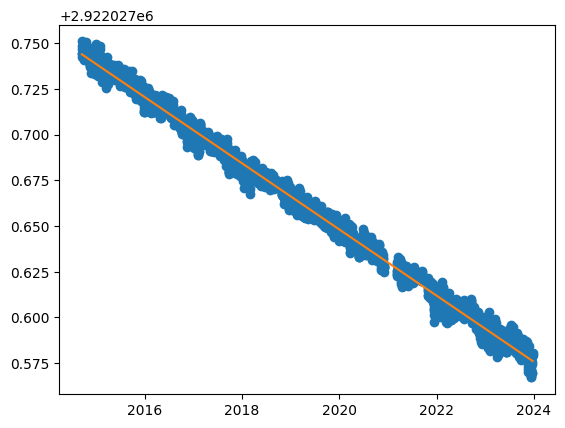

In [24]:
import matplotlib.pyplot as plt
plt.plot(t, xyz[:,0], 'o')
plt.plot(t, model.predict(t.reshape(-1,1))[:,0], '-')
plt.show()

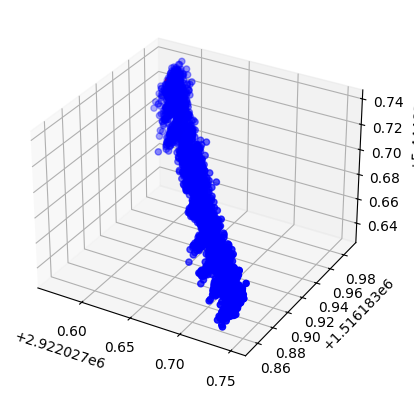

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='b', marker='o')
ax.scatter(model.predict(t.reshape(-1,1))[:,0], model.predict(t.reshape(-1,1))[:,1], model.predict(t.reshape(-1,1))[:,2], c='r', marker='o')
plt.show()

Lat: [59.012 59.012 59.012 59.012 59.012 59.012 59.012 59.012 59.012 59.012], Lon: [27.424 27.424 27.424 27.424 27.424 27.424 27.424 27.424 27.424 27.424]
Lat: [59.012 59.012 59.012 59.012 59.012 59.012 59.012 59.012 59.012 59.012], Lon: [27.424 27.424 27.424 27.424 27.424 27.424 27.424 27.424 27.424 27.424]


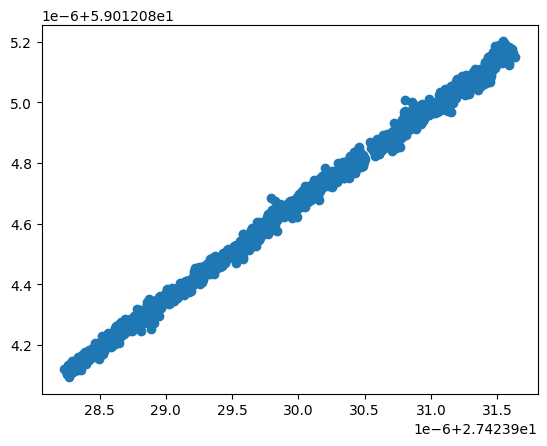

In [47]:
# change from xyz to lat/lon using hirvonen
# https://en.wikipedia.org/wiki/Hirvonen_projection

def xyz_to_phi_lam_h(x, y, z):
    # WGS84 ellipsoid parameters
    a = 6378137.0  # semi-major axis in meters
    f_inv = 298.257223563  # inverse flattening

    # Calculate eccentricity squared
    e_squared = 1 - (1 - 1 / f_inv) ** 2

    # Calculate longitude (lambda)
    lam = np.arctan2(y, x)

    # Calculate distance from the origin to the point in the XY plane
    p = np.sqrt(x ** 2 + y ** 2)

    # Calculate latitude (phi) iteratively
    phi = np.arctan2(z, p * (1 - e_squared))

    # Iterate to refine latitude
    for i in range(5):
        N = a / np.sqrt(1 - e_squared * np.sin(phi) ** 2)
        phi = np.arctan2(z + e_squared * N * np.sin(phi), p)

    # Calculate height (h)
    h = p / np.cos(phi) - N

    # Convert latitude and longitude from radians to degrees
    phi_deg = np.degrees(phi)
    lam_deg = np.degrees(lam)

    return phi_deg, lam_deg, h

lat, lon, h = xyz_to_phi_lam_h(xyz[:,0], xyz[:,1], xyz[:,2])
# print the first 10
print(f"Lat: {lat[:10]}, Lon: {lon[:10]}")
# last 10
print(f"Lat: {lat[-10:]}, Lon: {lon[-10:]}")
# plot
plt.plot(lon, lat, 'o')
plt.show()